In [55]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from matplotlib import style
import pickle
from sklearn import model_selection, datasets
from random import randint

In [56]:
data18 = pd.read_csv('2018-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data19 = pd.read_csv('2019-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])
data20 = pd.read_csv('2020-QS-World-University-Rankings.csv',
                     encoding='latin-1',
                     header=[0, 1])

In [57]:
data18.head()

,2018,2017,Institution Name,Country,Classification,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Academic Reputation,...,Unnamed: 12_level_0,Faculty Student,Unnamed: 14_level_0,Citations per Faculty,Unnamed: 16_level_0,International Faculty,Unnamed: 18_level_0,International Students,Unnamed: 20_level_0,Overall Score
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,SIZE,FOCUS,RESEARCH INTENSITY,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Unnamed: 21_level_1
0,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5.0,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
1,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
2,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5.0,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
3,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5.0,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7
4,5,4,UNIVERSITY OF CAMBRIDGE,United Kingdom,L,FC,VH,5.0,A,100,...,1,100,10,78.3,75,97.4,87,97.7,57,95.6


In [58]:
def resolve_columns(df: pd.core.frame.DataFrame) -> list:
    cols = []
    rankNumber = 1
    for column in df:
        if column[0].startswith('Unnamed'):
            if column[1].startswith('RANK'):
                cols.append(column[1] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[1])
        elif column[1].startswith('Unnamed'):
            if column[0].startswith('RANK'):
                cols.append(column[0] + '_' + str(rankNumber))
                rankNumber +=1
            else:
                cols.append(column[0])
        else:
            cols.append(column[0] + ' ' + column[1].capitalize())
    return cols

In [59]:
data18.columns = resolve_columns(data18)
data19.columns = resolve_columns(data19)
data20.columns = resolve_columns(data20)
data18.dtypes

2018                             object
2017                             object
Institution Name                 object
Country                          object
Classification Size              object
FOCUS                            object
RESEARCH INTENSITY               object
AGE                             float64
STATUS                           object
Academic Reputation Score        object
RANK_1                           object
Employer Reputation Score        object
RANK_2                           object
Faculty Student Score            object
RANK_3                           object
Citations per Faculty Score      object
RANK_4                           object
International Faculty Score      object
RANK_5                           object
International Students Score     object
RANK_6                           object
Overall Score                    object
dtype: object

In [60]:
#columns used for the determination of the rankings will be saved in a variable called det_columns
det_columns = ['Academic Reputation Score', 'Employer Reputation Score', 'Faculty Student Score',
               'Citations per Faculty Score', 'International Faculty Score', 'International Students Score']

In [61]:
data18.replace('-', 0,inplace=True)

<AxesSubplot:>

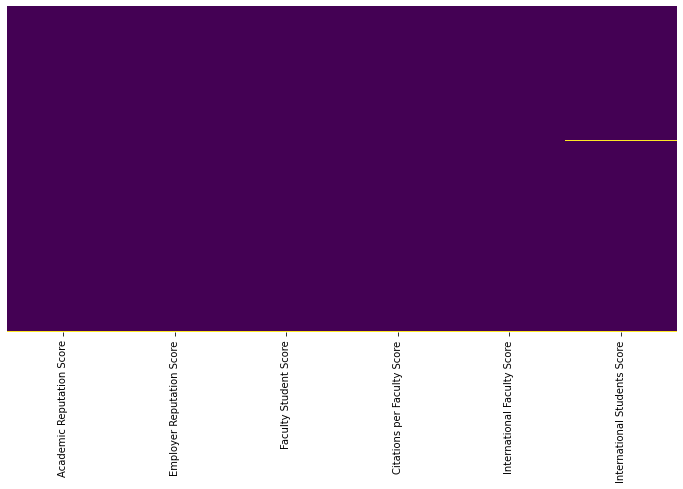

In [62]:
# checking null values in 2018 dataset
# yellow color means null value
plt.figure(figsize=(12,6))
sns.heatmap(data18[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [63]:
data18.replace('-', 0,inplace=True)

In [64]:
data18.isnull()

,2018,2017,Institution Name,Country,Classification Size,FOCUS,RESEARCH INTENSITY,AGE,STATUS,Academic Reputation Score,...,RANK_2,Faculty Student Score,RANK_3,Citations per Faculty Score,RANK_4,International Faculty Score,RANK_5,International Students Score,RANK_6,Overall Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
980,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
981,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
982,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [65]:
data19.replace('-', 0,inplace=True)


<AxesSubplot:>

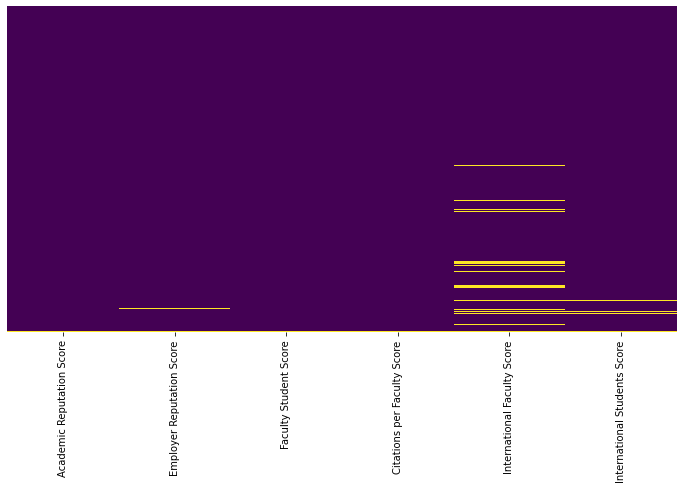

In [66]:
# checking null values in 2019 dataset
plt.figure(figsize=(12,6))
sns.heatmap(data19[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [67]:
data20.replace('-', 0,inplace=True)

<AxesSubplot:>

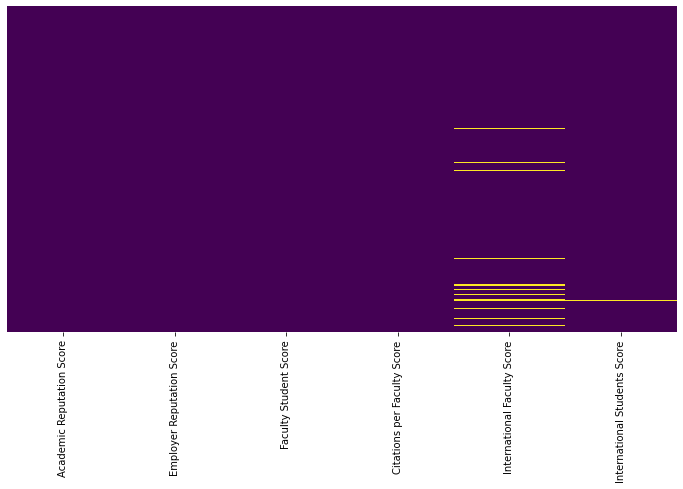

In [68]:
# Checking for null values in 2020 data
plt.figure(figsize=(12,6))
sns.heatmap(data20[det_columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)

# model training


In [69]:
data18 = data18.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data19 = data19.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
data20 = data20.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()

In [70]:
data18.dropna(inplace=True)
data19.dropna(inplace=True)
data20.dropna(inplace=True)


In [71]:
features18 = data18[det_columns]
features19 = data19[det_columns]
features20 = data20[det_columns]

In [72]:
feature_data = pd.concat([features18, features19, features20])
target_data = pd.concat([
    data18['Overall Score'], data19['Overall Score'], data20['Overall Score']
])

X = np.array(feature_data.values)
y = np.array(target_data.values)


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

In [73]:
best_accuracy = 0
least_acc = 1
for w in range(10000):
    rs = randint(1, 500)
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y, test_size=0.2, random_state=rs)

    model = LinearRegression()

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = model.score(x_test, y_test)  # acc stands for accuracy
    print("Accuracy: " + str(acc))
    if acc > best_accuracy:
        best_accuracy = acc
        with open("university_score", 'wb') as f:
            pickle.dump(model, f)
    else:
        if acc< least_acc:
            least_acc = acc
            
            

pickle_in = open("university_score", "rb")
model = pickle.load(pickle_in)

Accuracy: 0.9451640703192997
Accuracy: 0.9265317032883155
Accuracy: 0.9223717664122686
Accuracy: 0.9329496596420392
Accuracy: 0.9406088683933085
Accuracy: 0.9265520935561323
Accuracy: 0.9358930405339061
Accuracy: 0.9033548948413641
Accuracy: 0.9210547697928817
Accuracy: 0.9062959334712302
Accuracy: 0.9237059388881611
Accuracy: 0.9326217202776251
Accuracy: 0.9223406685136681
Accuracy: 0.9370610994890868
Accuracy: 0.9383575622686805
Accuracy: 0.9212991809177842
Accuracy: 0.9422750113534668
Accuracy: 0.9304498619397676
Accuracy: 0.9124776752898133
Accuracy: 0.9072308943017872
Accuracy: 0.9196178378337649
Accuracy: 0.9107001480449722
Accuracy: 0.9021008532771381
Accuracy: 0.9310022255482475
Accuracy: 0.9297903414756492
Accuracy: 0.9265317032883155
Accuracy: 0.92386267889937
Accuracy: 0.9193065517024627
Accuracy: 0.9226610425414903
Accuracy: 0.9181321392645863
Accuracy: 0.9308811655053877
Accuracy: 0.926852576737927
Accuracy: 0.9094149565967187
Accuracy: 0.9283660077837327
Accuracy: 0.93044

Accuracy: 0.9258288392072153
Accuracy: 0.9354782759369548
Accuracy: 0.9349320860752363
Accuracy: 0.9079812422174287
Accuracy: 0.9193822473575497
Accuracy: 0.9292803682921521
Accuracy: 0.9258288392072153
Accuracy: 0.9187429593729758
Accuracy: 0.9377695984630036
Accuracy: 0.9107778887079088
Accuracy: 0.9086594137726294
Accuracy: 0.9193750607653702
Accuracy: 0.9411986344557581
Accuracy: 0.9153517984111492
Accuracy: 0.9173540172257957
Accuracy: 0.9186886620618474
Accuracy: 0.908384600868043
Accuracy: 0.9365220872931276
Accuracy: 0.9175894072758792
Accuracy: 0.9112437396301508
Accuracy: 0.9228367749104808
Accuracy: 0.922299027556936
Accuracy: 0.9217650724543248
Accuracy: 0.9168125245071206
Accuracy: 0.9269075804707447
Accuracy: 0.9212589932729177
Accuracy: 0.9234810936972814
Accuracy: 0.9227349460217116
Accuracy: 0.9148465835023936
Accuracy: 0.9134236045852544
Accuracy: 0.923717648006769
Accuracy: 0.8894629131624052
Accuracy: 0.919306885762893
Accuracy: 0.9202069906652888
Accuracy: 0.920307

Accuracy: 0.9425986044109429
Accuracy: 0.9046033439244286
Accuracy: 0.9393757914058177
Accuracy: 0.9304498619397676
Accuracy: 0.902428010391802
Accuracy: 0.9214143970748251
Accuracy: 0.9229351490070227
Accuracy: 0.9181321392645863
Accuracy: 0.933785711766056
Accuracy: 0.9237059388881611
Accuracy: 0.9300852605459059
Accuracy: 0.9268954135649016
Accuracy: 0.9218041364174071
Accuracy: 0.9368234403380974
Accuracy: 0.9271365373205773
Accuracy: 0.9163399800332019
Accuracy: 0.9049523677276703
Accuracy: 0.9258249573135571
Accuracy: 0.9046033439244286
Accuracy: 0.9368216885290844
Accuracy: 0.9180812035739255
Accuracy: 0.9180900659275741
Accuracy: 0.9237403645820061
Accuracy: 0.917073051932159
Accuracy: 0.9308811655053877
Accuracy: 0.9217891723108691
Accuracy: 0.9262665798059359
Accuracy: 0.9180884894015662
Accuracy: 0.935730747423131
Accuracy: 0.9453072248204982
Accuracy: 0.9234810936972814
Accuracy: 0.9256331192043034
Accuracy: 0.9261012167043959
Accuracy: 0.907127155764592
Accuracy: 0.9131773

Accuracy: 0.933785711766056
Accuracy: 0.9342820228553638
Accuracy: 0.9248994583211632
Accuracy: 0.9271365373205773
Accuracy: 0.9080032599608351
Accuracy: 0.9083081436058273
Accuracy: 0.9290804681157349
Accuracy: 0.9298372878805928
Accuracy: 0.9163803457392625
Accuracy: 0.9273898346078129
Accuracy: 0.9403397234536424
Accuracy: 0.9236719065151705
Accuracy: 0.9331921815568912
Accuracy: 0.908511643744577
Accuracy: 0.9094319461583398
Accuracy: 0.9406088683933085
Accuracy: 0.9358930405339061
Accuracy: 0.9260684839193869
Accuracy: 0.9273505789314268
Accuracy: 0.9290346979004964
Accuracy: 0.9141847439278601
Accuracy: 0.9393757914058177
Accuracy: 0.8939628354413388
Accuracy: 0.9271389510717614
Accuracy: 0.9124776752898133
Accuracy: 0.9311625802007271
Accuracy: 0.912531969586414
Accuracy: 0.902428010391802
Accuracy: 0.9276435108200628
Accuracy: 0.9380878249701831
Accuracy: 0.9195649738590487
Accuracy: 0.8992255648063467
Accuracy: 0.8997741235645057
Accuracy: 0.9163147405017612
Accuracy: 0.932609

Accuracy: 0.9202109623467708
Accuracy: 0.9175894072758792
Accuracy: 0.9300565318309859
Accuracy: 0.9256621858402418
Accuracy: 0.9111118781697516
Accuracy: 0.9394425738886977
Accuracy: 0.9307853925672918
Accuracy: 0.9201023114964472
Accuracy: 0.9304498619397676
Accuracy: 0.9010613614774144
Accuracy: 0.9200093980170553
Accuracy: 0.9161780431529358
Accuracy: 0.9079812422174287
Accuracy: 0.9324018335751671
Accuracy: 0.902428010391802
Accuracy: 0.9212991809177842
Accuracy: 0.9358521144847022
Accuracy: 0.9239501177049708
Accuracy: 0.9146478477988346
Accuracy: 0.9238293646897495
Accuracy: 0.9290804681157349
Accuracy: 0.9258187806059133
Accuracy: 0.9247350196771973
Accuracy: 0.9010613614774144
Accuracy: 0.9188243310508425
Accuracy: 0.9155435266514067
Accuracy: 0.922058345500104
Accuracy: 0.9310022255482475
Accuracy: 0.9391472476384739
Accuracy: 0.9197913047742061
Accuracy: 0.922346357527642
Accuracy: 0.9307189758690871
Accuracy: 0.9152820944807936
Accuracy: 0.9241709378325654
Accuracy: 0.90001

Accuracy: 0.9187429593729758
Accuracy: 0.9094319461583398
Accuracy: 0.9198219891935487
Accuracy: 0.9223406685136681
Accuracy: 0.9090007415930957
Accuracy: 0.9425986044109429
Accuracy: 0.9193102142561935
Accuracy: 0.9265697133654783
Accuracy: 0.9168125245071206
Accuracy: 0.9260300133605844
Accuracy: 0.9083081436058273
Accuracy: 0.9162036637212199
Accuracy: 0.9140691857734778
Accuracy: 0.9166152157170665
Accuracy: 0.9134236045852544
Accuracy: 0.9453072248204982
Accuracy: 0.9204553988186117
Accuracy: 0.9189592175856448
Accuracy: 0.9229085887202986
Accuracy: 0.9217978768746778
Accuracy: 0.9152820944807936
Accuracy: 0.9146478477988346
Accuracy: 0.9174069450800945
Accuracy: 0.9174859969126481
Accuracy: 0.9219453860442739
Accuracy: 0.9134236045852544
Accuracy: 0.9049523677276703
Accuracy: 0.9222311531203864
Accuracy: 0.9300565318309859
Accuracy: 0.908384600868043
Accuracy: 0.929573968029179
Accuracy: 0.908384600868043
Accuracy: 0.9046033439244286
Accuracy: 0.922299027556936
Accuracy: 0.933699

Accuracy: 0.9172298351121623
Accuracy: 0.9358521144847022
Accuracy: 0.9310207113189385
Accuracy: 0.9240547193001143
Accuracy: 0.926852576737927
Accuracy: 0.9226610425414903
Accuracy: 0.9248994583211632
Accuracy: 0.9267757712597319
Accuracy: 0.9347972488942329
Accuracy: 0.8992255648063467
Accuracy: 0.9418964695750581
Accuracy: 0.9143815225995757
Accuracy: 0.9424737244418436
Accuracy: 0.9297903414756492
Accuracy: 0.8975162242707837
Accuracy: 0.9105832488733715
Accuracy: 0.9165704933772226
Accuracy: 0.9187889832049383
Accuracy: 0.9068656127394749
Accuracy: 0.9310977713442625
Accuracy: 0.9158239381551072
Accuracy: 0.9158239381551072
Accuracy: 0.927765180423314
Accuracy: 0.8728288015684056
Accuracy: 0.9145965858477988
Accuracy: 0.9297903414756492
Accuracy: 0.9107001480449722
Accuracy: 0.9265697133654783
Accuracy: 0.9079084828305868
Accuracy: 0.9306577083905159
Accuracy: 0.9196436214774631
Accuracy: 0.8966254902063718
Accuracy: 0.9206693642995488
Accuracy: 0.8983577261077378
Accuracy: 0.9368

Accuracy: 0.9372450664983247
Accuracy: 0.9436319964897987
Accuracy: 0.9193102142561935
Accuracy: 0.9248288725582057
Accuracy: 0.9187875402000468
Accuracy: 0.9380878249701831
Accuracy: 0.9037794467884444
Accuracy: 0.9345374184629112
Accuracy: 0.9261980836901551
Accuracy: 0.9269119697244868
Accuracy: 0.9218893533074718
Accuracy: 0.9289207837735606
Accuracy: 0.9336999953102062
Accuracy: 0.9256331192043034
Accuracy: 0.9033548948413641
Accuracy: 0.8960031839254914
Accuracy: 0.9204573279080298
Accuracy: 0.9097386712923354
Accuracy: 0.9219747862335769
Accuracy: 0.9161041242625688
Accuracy: 0.9196436214774631
Accuracy: 0.9180073959221124
Accuracy: 0.9265317032883155
Accuracy: 0.9258288392072153
Accuracy: 0.9177498348489715
Accuracy: 0.9062959334712302
Accuracy: 0.9248288725582057
Accuracy: 0.9079014654547888
Accuracy: 0.9260300133605844
Accuracy: 0.9250015534348515
Accuracy: 0.920960596403977
Accuracy: 0.9111836294137516
Accuracy: 0.9216972098163347
Accuracy: 0.9150691416159877
Accuracy: 0.926

Accuracy: 0.914809379619355
Accuracy: 0.9262665798059359
Accuracy: 0.924169430052239
Accuracy: 0.902428010391802
Accuracy: 0.9313707832806289
Accuracy: 0.9292687444161835
Accuracy: 0.9372603510326685
Accuracy: 0.9277064818410163
Accuracy: 0.9244487086076443
Accuracy: 0.9278075747084431
Accuracy: 0.9436319964897987
Accuracy: 0.9177498348489715
Accuracy: 0.9193052706230539
Accuracy: 0.9241711897932906
Accuracy: 0.908644739913995
Accuracy: 0.908644739913995
Accuracy: 0.9197913047742061
Accuracy: 0.9119680590715276
Accuracy: 0.9097995559195473
Accuracy: 0.9256055412223185
Accuracy: 0.9094149565967187
Accuracy: 0.9216972098163347
Accuracy: 0.9312565022048646
Accuracy: 0.9311270553299533
Accuracy: 0.9243517770084294
Accuracy: 0.9422273110876689
Accuracy: 0.9136154146106146
Accuracy: 0.9124776752898133
Accuracy: 0.9290346979004964
Accuracy: 0.9251430939936262
Accuracy: 0.9251430939936262
Accuracy: 0.9119427380161411
Accuracy: 0.9130836969991732
Accuracy: 0.926852576737927
Accuracy: 0.91196332

Accuracy: 0.9322147546155017
Accuracy: 0.9246957427564808
Accuracy: 0.9425986044109429
Accuracy: 0.935528984882058
Accuracy: 0.9408117851515859
Accuracy: 0.9256389454629786
Accuracy: 0.9086594137726294
Accuracy: 0.9277340896104306
Accuracy: 0.9300852605459059
Accuracy: 0.9223717664122686
Accuracy: 0.9186636336793264
Accuracy: 0.9331921815568912
Accuracy: 0.9329496596420392
Accuracy: 0.9326217202776251
Accuracy: 0.9155732624840629
Accuracy: 0.9269075804707447
Accuracy: 0.9163399800332019
Accuracy: 0.9158646560146116
Accuracy: 0.9272936848664082
Accuracy: 0.9193065517024627
Accuracy: 0.8946442809391268
Accuracy: 0.914299762593814
Accuracy: 0.8894629131624052
Accuracy: 0.9383575622686805
Accuracy: 0.9147898077914421
Accuracy: 0.9179832883789035
Accuracy: 0.9132774034759873
Accuracy: 0.9155435266514067
Accuracy: 0.9238293646897495
Accuracy: 0.9311270553299533
Accuracy: 0.9243517770084294
Accuracy: 0.9424919462680895
Accuracy: 0.9115500952705766
Accuracy: 0.9289207837735606
Accuracy: 0.9424

Accuracy: 0.9024845178400217
Accuracy: 0.9202109623467708
Accuracy: 0.935528984882058
Accuracy: 0.905524301343541
Accuracy: 0.9325875103658476
Accuracy: 0.9231819505942902
Accuracy: 0.9451640703192997
Accuracy: 0.9371058903830594
Accuracy: 0.8846625222377715
Accuracy: 0.9284335038542161
Accuracy: 0.9168161469159009
Accuracy: 0.9187875402000468
Accuracy: 0.9289957938812947
Accuracy: 0.9131349402716937
Accuracy: 0.9216972098163347
Accuracy: 0.8981698854606969
Accuracy: 0.923574873991061
Accuracy: 0.9234421172516527
Accuracy: 0.909100954424411
Accuracy: 0.9283009148898221
Accuracy: 0.9122082570511193
Accuracy: 0.917073051932159
Accuracy: 0.9115500952705766
Accuracy: 0.9453803013197607
Accuracy: 0.9255153491208086
Accuracy: 0.9313707832806289
Accuracy: 0.922299027556936
Accuracy: 0.927471657232009
Accuracy: 0.9168021688172603
Accuracy: 0.8846625222377715
Accuracy: 0.9314822853075102
Accuracy: 0.927722988638563
Accuracy: 0.927765180423314
Accuracy: 0.8946442809391268
Accuracy: 0.93624472829

Accuracy: 0.9208410066370076
Accuracy: 0.9300565318309859
Accuracy: 0.9033548948413641
Accuracy: 0.9232669734498514
Accuracy: 0.9344881212239491
Accuracy: 0.9138365762803551
Accuracy: 0.9084250931055443
Accuracy: 0.9356985863258869
Accuracy: 0.9241711897932906
Accuracy: 0.9204573279080298
Accuracy: 0.9097386712923354
Accuracy: 0.9173540172257957
Accuracy: 0.9139669531434496
Accuracy: 0.9210547697928817
Accuracy: 0.9150179519670453
Accuracy: 0.9269119697244868
Accuracy: 0.9342820228553638
Accuracy: 0.9087540685513614
Accuracy: 0.9168569884631725
Accuracy: 0.9132774034759873
Accuracy: 0.9246716010050788
Accuracy: 0.9295074935454435
Accuracy: 0.919306885762893
Accuracy: 0.9308811655053877
Accuracy: 0.9196384015006647
Accuracy: 0.9372603510326685
Accuracy: 0.9090007415930957
Accuracy: 0.9124428076625979
Accuracy: 0.9265317032883155
Accuracy: 0.9049523677276703
Accuracy: 0.9072308943017872
Accuracy: 0.9284335038542161
Accuracy: 0.9181321392645863
Accuracy: 0.9216076348475674
Accuracy: 0.909

Accuracy: 0.9267757712597319
Accuracy: 0.9178048994442574
Accuracy: 0.922346357527642
Accuracy: 0.8981698854606969
Accuracy: 0.9354782759369548
Accuracy: 0.935528984882058
Accuracy: 0.9358930405339061
Accuracy: 0.9167095611369053
Accuracy: 0.9265317032883155
Accuracy: 0.9253704192164289
Accuracy: 0.9368216885290844
Accuracy: 0.9119680590715276
Accuracy: 0.9094822445851948
Accuracy: 0.8979969873207833
Accuracy: 0.9180812035739255
Accuracy: 0.9248288725582057
Accuracy: 0.9323089227958952
Accuracy: 0.9396145138514924
Accuracy: 0.9344881212239491
Accuracy: 0.9261012167043959
Accuracy: 0.9346200196937016
Accuracy: 0.9200329099985838
Accuracy: 0.9077121866307779
Accuracy: 0.8975162242707837
Accuracy: 0.8894629131624052
Accuracy: 0.9271389510717614
Accuracy: 0.9265520935561323
Accuracy: 0.92386267889937
Accuracy: 0.9189840639113127
Accuracy: 0.9253704192164289
Accuracy: 0.9222951286449826
Accuracy: 0.9122122884363536
Accuracy: 0.9391472476384739
Accuracy: 0.9167095611369053
Accuracy: 0.918824

Accuracy: 0.9262665798059359
Accuracy: 0.9094822445851948
Accuracy: 0.9291668450177238
Accuracy: 0.9393517563375994
Accuracy: 0.9011772966776851
Accuracy: 0.9229085887202986
Accuracy: 0.9244126542697491
Accuracy: 0.9377695984630036
Accuracy: 0.9197682702557456
Accuracy: 0.9191286602343633
Accuracy: 0.9325997374522745
Accuracy: 0.9019305736966379
Accuracy: 0.9191286602343633
Accuracy: 0.9147898077914421
Accuracy: 0.9301432407261129
Accuracy: 0.9156390922916109
Accuracy: 0.9144048929895451
Accuracy: 0.9203077886706377
Accuracy: 0.9258249573135571
Accuracy: 0.928099971109366
Accuracy: 0.9062959334712302
Accuracy: 0.9197682702557456
Accuracy: 0.9168021688172603
Accuracy: 0.9298372878805928
Accuracy: 0.9112437396301508
Accuracy: 0.9148465835023936
Accuracy: 0.9284241631113614
Accuracy: 0.914299762593814
Accuracy: 0.9406088683933085
Accuracy: 0.9374333776098727
Accuracy: 0.9170593503415827
Accuracy: 0.9039188423270104
Accuracy: 0.9310207113189385
Accuracy: 0.9112437396301508
Accuracy: 0.9258

Accuracy: 0.9200329099985838
Accuracy: 0.9122082570511193
Accuracy: 0.9283660077837327
Accuracy: 0.9310207113189385
Accuracy: 0.9344881212239491
Accuracy: 0.9111118781697516
Accuracy: 0.9219453860442739
Accuracy: 0.9399885070403783
Accuracy: 0.9256055412223185
Accuracy: 0.9131349402716937
Accuracy: 0.9226610425414903
Accuracy: 0.9250530733060269
Accuracy: 0.9486569718302693
Accuracy: 0.9461922045599365
Accuracy: 0.9317851285816325
Accuracy: 0.922346357527642
Accuracy: 0.9261756228127612
Accuracy: 0.9331533060737718
Accuracy: 0.9223406685136681
Accuracy: 0.9273505789314268
Accuracy: 0.922346357527642
Accuracy: 0.8997741235645057
Accuracy: 0.9122122884363536
Accuracy: 0.9399885070403783
Accuracy: 0.9188243310508425
Accuracy: 0.9300852605459059
Accuracy: 0.9153108195024406
Accuracy: 0.8975162242707837
Accuracy: 0.9212589932729177
Accuracy: 0.9214143970748251
Accuracy: 0.9253973357339718
Accuracy: 0.920960596403977
Accuracy: 0.9394425738886977
Accuracy: 0.9119680590715276
Accuracy: 0.92718

Accuracy: 0.9239501177049708
Accuracy: 0.919306885762893
Accuracy: 0.9290643604520449
Accuracy: 0.9336999953102062
Accuracy: 0.9225936995149261
Accuracy: 0.9177498348489715
Accuracy: 0.9188917813892957
Accuracy: 0.9238293646897495
Accuracy: 0.9300565318309859
Accuracy: 0.9380878249701831
Accuracy: 0.9287796895263803
Accuracy: 0.9107778887079088
Accuracy: 0.9322370711925313
Accuracy: 0.929573968029179
Accuracy: 0.9295800778945437
Accuracy: 0.9417103497293412
Accuracy: 0.9257705873908695
Accuracy: 0.9455337089038193
Accuracy: 0.9136154146106146
Accuracy: 0.9290804681157349
Accuracy: 0.9043638841287417
Accuracy: 0.9165404809475757
Accuracy: 0.9158239381551072
Accuracy: 0.9146478477988346
Accuracy: 0.9345374184629112
Accuracy: 0.9393373147443501
Accuracy: 0.9424737244418436
Accuracy: 0.9191286602343633
Accuracy: 0.9268954135649016
Accuracy: 0.9201023114964472
Accuracy: 0.9310207113189385
Accuracy: 0.9217978768746778
Accuracy: 0.9302155771640057
Accuracy: 0.93038477060904
Accuracy: 0.929080

Accuracy: 0.9297903414756492
Accuracy: 0.9168366543761288
Accuracy: 0.9316005410745557
Accuracy: 0.9300565318309859
Accuracy: 0.9241709378325654
Accuracy: 0.9174859969126481
Accuracy: 0.9153517984111492
Accuracy: 0.9134236045852544
Accuracy: 0.9406088683933085
Accuracy: 0.9217978768746778
Accuracy: 0.9138681228068902
Accuracy: 0.9156390922916109
Accuracy: 0.9422750113534668
Accuracy: 0.9037794467884444
Accuracy: 0.9172300590627005
Accuracy: 0.9083081436058273
Accuracy: 0.9402085399792737
Accuracy: 0.9158239381551072
Accuracy: 0.9276435108200628
Accuracy: 0.9055493359460067
Accuracy: 0.9403397234536424
Accuracy: 0.9298372878805928
Accuracy: 0.9198219891935487
Accuracy: 0.9273898346078129
Accuracy: 0.9193750607653702
Accuracy: 0.9196436214774631
Accuracy: 0.9216050020518423
Accuracy: 0.9289207837735606
Accuracy: 0.9269559377151744
Accuracy: 0.9043638841287417
Accuracy: 0.9331921815568912
Accuracy: 0.91377858296063
Accuracy: 0.9365220872931276
Accuracy: 0.9134236045852544
Accuracy: 0.9337

Accuracy: 0.9097995559195473
Accuracy: 0.9225936995149261
Accuracy: 0.9193102142561935
Accuracy: 0.9033548948413641
Accuracy: 0.9391472476384739
Accuracy: 0.9261756228127612
Accuracy: 0.9258517263027445
Accuracy: 0.9047562762141246
Accuracy: 0.9273505789314268
Accuracy: 0.9187429593729758
Accuracy: 0.9218893533074718
Accuracy: 0.9362447282970496
Accuracy: 0.9166279666779229
Accuracy: 0.9396915854900887
Accuracy: 0.9377695984630036
Accuracy: 0.9172127927086324
Accuracy: 0.9243517770084294
Accuracy: 0.9186886620618474
Accuracy: 0.9284335038542161
Accuracy: 0.914809379619355
Accuracy: 0.9300568003662792
Accuracy: 0.9199183026955704
Accuracy: 0.935730747423131
Accuracy: 0.9422750113534668
Accuracy: 0.9256389454629786
Accuracy: 0.9187875402000468
Accuracy: 0.9221875204273201
Accuracy: 0.9310977713442625
Accuracy: 0.9291668450177238
Accuracy: 0.9180073959221124
Accuracy: 0.9222951286449826
Accuracy: 0.9269559377151744
Accuracy: 0.9265317032883155
Accuracy: 0.9229351490070227
Accuracy: 0.9281

Accuracy: 0.8846625222377715
Accuracy: 0.9079014654547888
Accuracy: 0.9192893289822475
Accuracy: 0.9183379202677835
Accuracy: 0.8960031839254914
Accuracy: 0.9201023114964472
Accuracy: 0.9258249573135571
Accuracy: 0.9408117851515859
Accuracy: 0.909205613688432
Accuracy: 0.9314822853075102
Accuracy: 0.9232669734498514
Accuracy: 0.9241709378325654
Accuracy: 0.9415834635440062
Accuracy: 0.9451640703192997
Accuracy: 0.9325875103658476
Accuracy: 0.9260318794023565
Accuracy: 0.9136154146106146
Accuracy: 0.9256331192043034
Accuracy: 0.9311621446118099
Accuracy: 0.9094822445851948
Accuracy: 0.8992255648063467
Accuracy: 0.9329496596420392
Accuracy: 0.9326217202776251
Accuracy: 0.9259391549578223
Accuracy: 0.9292687444161835
Accuracy: 0.9138078897469898
Accuracy: 0.9277064818410163
Accuracy: 0.9313707832806289
Accuracy: 0.927722988638563
Accuracy: 0.9212432540541075
Accuracy: 0.9118194804395413
Accuracy: 0.9124776752898133
Accuracy: 0.9401325755072283
Accuracy: 0.9145965858477988
Accuracy: 0.9372

Accuracy: 0.9307189758690871
Accuracy: 0.9168125245071206
Accuracy: 0.9295074935454435
Accuracy: 0.9203077886706377
Accuracy: 0.9399885070403783
Accuracy: 0.9249826054409297
Accuracy: 0.9312565022048646
Accuracy: 0.9168161469159009
Accuracy: 0.9126823050934554
Accuracy: 0.9377695984630036
Accuracy: 0.9172298351121623
Accuracy: 0.9021008532771381
Accuracy: 0.9313707832806289
Accuracy: 0.9196436214774631
Accuracy: 0.9261295078511155
Accuracy: 0.9365220872931276
Accuracy: 0.9277064818410163
Accuracy: 0.9204553988186117
Accuracy: 0.9440188461411043
Accuracy: 0.914808393130682
Accuracy: 0.9399176660811047
Accuracy: 0.9118954269431526
Accuracy: 0.9349320860752363
Accuracy: 0.9138078897469898
Accuracy: 0.9234810936972814
Accuracy: 0.9216050020518423
Accuracy: 0.9212589932729177
Accuracy: 0.9394425738886977
Accuracy: 0.9262665798059359
Accuracy: 0.9377695984630036
Accuracy: 0.9033548948413641
Accuracy: 0.9323089227958952
Accuracy: 0.9166405018442321
Accuracy: 0.9204438602924936
Accuracy: 0.919

Accuracy: 0.9234138690895639
Accuracy: 0.9262577278339545
Accuracy: 0.9202069906652888
Accuracy: 0.9273505789314268
Accuracy: 0.9140646757814396
Accuracy: 0.9403397234536424
Accuracy: 0.9370610994890868
Accuracy: 0.9324018335751671
Accuracy: 0.9106170450609582
Accuracy: 0.9189592175856448
Accuracy: 0.9324018335751671
Accuracy: 0.9256331192043034
Accuracy: 0.9119633215714098
Accuracy: 0.9148673871637041
Accuracy: 0.9163399800332019
Accuracy: 0.9310855014689357
Accuracy: 0.9197913047742061
Accuracy: 0.93038477060904
Accuracy: 0.9393373147443501
Accuracy: 0.9173540172257957
Accuracy: 0.9180812035739255
Accuracy: 0.9174069450800945
Accuracy: 0.9337105723328063
Accuracy: 0.9046033439244286
Accuracy: 0.9380878249701831
Accuracy: 0.9336999953102062
Accuracy: 0.9010613614774144
Accuracy: 0.9217891723108691
Accuracy: 0.9401325755072283
Accuracy: 0.9087540685513614
Accuracy: 0.9169886650349811
Accuracy: 0.9141847439278601
Accuracy: 0.9425515416409541
Accuracy: 0.9290346979004964
Accuracy: 0.9173

Accuracy: 0.9175894072758792
Accuracy: 0.9094319461583398
Accuracy: 0.9156390922916109
Accuracy: 0.9277340896104306
Accuracy: 0.9144048929895451
Accuracy: 0.9314822853075102
Accuracy: 0.919306885762893
Accuracy: 0.9021028642237973
Accuracy: 0.9259391549578223
Accuracy: 0.9380878249701831
Accuracy: 0.9260300133605844
Accuracy: 0.9122082570511193
Accuracy: 0.922299027556936
Accuracy: 0.9310977713442625
Accuracy: 0.9079014654547888
Accuracy: 0.9265520935561323
Accuracy: 0.9284335038542161
Accuracy: 0.9284241631113614
Accuracy: 0.9175894072758792
Accuracy: 0.9186636336793264
Accuracy: 0.9202069906652888
Accuracy: 0.9140691857734778
Accuracy: 0.9329496596420392
Accuracy: 0.9172300590627005
Accuracy: 0.8974946284634727
Accuracy: 0.9365220872931276
Accuracy: 0.9313707832806289
Accuracy: 0.9342820228553638
Accuracy: 0.9216050020518423
Accuracy: 0.9094319461583398
Accuracy: 0.9344295861709476
Accuracy: 0.9308811655053877
Accuracy: 0.8728288015684056
Accuracy: 0.9310022255482475
Accuracy: 0.9261

Accuracy: 0.9310977713442625
Accuracy: 0.9396145138514924
Accuracy: 0.9228367749104808
Accuracy: 0.9286966744655792
Accuracy: 0.9300565318309859
Accuracy: 0.9436319964897987
Accuracy: 0.9253704192164289
Accuracy: 0.9368683234735798
Accuracy: 0.9319415653475285
Accuracy: 0.9278075747084431
Accuracy: 0.9079606070949422
Accuracy: 0.9230897453027092
Accuracy: 0.902428010391802
Accuracy: 0.9391472476384739
Accuracy: 0.9193102142561935
Accuracy: 0.909842392946142
Accuracy: 0.9415834635440062
Accuracy: 0.9249826054409297
Accuracy: 0.9300568003662792
Accuracy: 0.9162036637212199
Accuracy: 0.9055493359460067
Accuracy: 0.9269119697244868
Accuracy: 0.9163399800332019
Accuracy: 0.9237403645820061
Accuracy: 0.9191286602343633
Accuracy: 0.9166405018442321
Accuracy: 0.9368683234735798
Accuracy: 0.9345374184629112
Accuracy: 0.9165704933772226
Accuracy: 0.9317851285816325
Accuracy: 0.9295869624524951
Accuracy: 0.9218893533074718
Accuracy: 0.9043638841287417
Accuracy: 0.8983577261077378
Accuracy: 0.9209

Accuracy: 0.9314822853075102
Accuracy: 0.9310207113189385
Accuracy: 0.9072308943017872
Accuracy: 0.9193065517024627
Accuracy: 0.9175499745896123
Accuracy: 0.9097995559195473
Accuracy: 0.9486569718302693
Accuracy: 0.9349320860752363
Accuracy: 0.9406088683933085
Accuracy: 0.8979969873207833
Accuracy: 0.9269119697244868
Accuracy: 0.93038477060904
Accuracy: 0.9119680590715276
Accuracy: 0.9399885070403783
Accuracy: 0.9144048929895451
Accuracy: 0.9097386712923354
Accuracy: 0.9346574565677059
Accuracy: 0.9180812035739255
Accuracy: 0.940463255360688
Accuracy: 0.9424453225299287
Accuracy: 0.9324018335751671
Accuracy: 0.9356985863258869
Accuracy: 0.9249826054409297
Accuracy: 0.9346574565677059
Accuracy: 0.9262577278339545
Accuracy: 0.9403315200219217
Accuracy: 0.9183379202677835
Accuracy: 0.9155435266514067
Accuracy: 0.9002819205643602
Accuracy: 0.9039188423270104
Accuracy: 0.9292803682921521
Accuracy: 0.9418964695750581
Accuracy: 0.923717648006769
Accuracy: 0.9239501177049708
Accuracy: 0.930574

Accuracy: 0.9240861548052552
Accuracy: 0.9393373147443501
Accuracy: 0.9153517984111492
Accuracy: 0.9312565022048646
Accuracy: 0.9274190153038969
Accuracy: 0.9109122271757985
Accuracy: 0.9311621446118099
Accuracy: 0.893641986872067
Accuracy: 0.931507412752993
Accuracy: 0.9168366543761288
Accuracy: 0.9175709931111516
Accuracy: 0.9147898077914421
Accuracy: 0.9417103497293412
Accuracy: 0.9304498619397676
Accuracy: 0.9322147546155017
Accuracy: 0.9383575622686805
Accuracy: 0.9440188461411043
Accuracy: 0.9021008532771381
Accuracy: 0.9265697133654783
Accuracy: 0.9097386712923354
Accuracy: 0.8929987430800257
Accuracy: 0.9319415653475285
Accuracy: 0.9040500946503677
Accuracy: 0.9424919462680895
Accuracy: 0.8893674237521484
Accuracy: 0.9234810936972814
Accuracy: 0.9198373582285455
Accuracy: 0.9094319461583398
Accuracy: 0.9068656127394749
Accuracy: 0.9262577278339545
Accuracy: 0.9168021688172603
Accuracy: 0.9369070577721189
Accuracy: 0.9094149565967187
Accuracy: 0.9290346979004964
Accuracy: 0.9323

Accuracy: 0.9186886620618474
Accuracy: 0.9268954135649016
Accuracy: 0.9265520935561323
Accuracy: 0.9181321392645863
Accuracy: 0.9169886650349811
Accuracy: 0.9380878249701831
Accuracy: 0.9156318749197794
Accuracy: 0.9177498348489715
Accuracy: 0.9153517984111492
Accuracy: 0.9310855014689357
Accuracy: 0.9172300590627005
Accuracy: 0.9260300133605844
Accuracy: 0.9131349402716937
Accuracy: 0.923717648006769
Accuracy: 0.9119427380161411
Accuracy: 0.9399885070403783
Accuracy: 0.9167095611369053
Accuracy: 0.9152820944807936
Accuracy: 0.9159583069005216
Accuracy: 0.9268954135649016
Accuracy: 0.9115500952705766
Accuracy: 0.9158239381551072
Accuracy: 0.9248288725582057
Accuracy: 0.9196436214774631
Accuracy: 0.9232669734498514
Accuracy: 0.922346357527642
Accuracy: 0.9316005410745557
Accuracy: 0.9174859969126481
Accuracy: 0.9180073959221124
Accuracy: 0.9166152157170665
Accuracy: 0.9010613614774144
Accuracy: 0.9138681228068902
Accuracy: 0.9225899712208852
Accuracy: 0.9163803457392625
Accuracy: 0.9315

Accuracy: 0.9222951286449826
Accuracy: 0.9134236045852544
Accuracy: 0.9216972098163347
Accuracy: 0.9237059388881611
Accuracy: 0.9172298351121623
Accuracy: 0.9197058957538157
Accuracy: 0.9346574565677059
Accuracy: 0.9011772966776851
Accuracy: 0.9035508247150525
Accuracy: 0.9344881212239491
Accuracy: 0.9165704933772226
Accuracy: 0.9258517263027445
Accuracy: 0.9096739359153176
Accuracy: 0.902428010391802
Accuracy: 0.9177498348489715
Accuracy: 0.9258249573135571
Accuracy: 0.8911592269830263
Accuracy: 0.9323089227958952
Accuracy: 0.9258187806059133
Accuracy: 0.9212432540541075
Accuracy: 0.9187875402000468
Accuracy: 0.9124428076625979
Accuracy: 0.927765180423314
Accuracy: 0.9119427380161411
Accuracy: 0.9079014654547888
Accuracy: 0.9130836969991732
Accuracy: 0.919413511285102
Accuracy: 0.9168569884631725
Accuracy: 0.9175709931111516
Accuracy: 0.9409861783361513
Accuracy: 0.9180073959221124
Accuracy: 0.9368683234735798
Accuracy: 0.9193065517024627
Accuracy: 0.9226610425414903
Accuracy: 0.92129

Accuracy: 0.9156318749197794
Accuracy: 0.9250015534348515
Accuracy: 0.9043638841287417
Accuracy: 0.9326099820304319
Accuracy: 0.9147898077914421
Accuracy: 0.9330063483702985
Accuracy: 0.9306577083905159
Accuracy: 0.9168569884631725
Accuracy: 0.9380878249701831
Accuracy: 0.9132774034759873
Accuracy: 0.9283660077837327
Accuracy: 0.9261980836901551
Accuracy: 0.9109122271757985
Accuracy: 0.9180073959221124
Accuracy: 0.9193102142561935
Accuracy: 0.9411986344557581
Accuracy: 0.9202069906652888
Accuracy: 0.9198995144737001
Accuracy: 0.8966254902063718
Accuracy: 0.9297457840850716
Accuracy: 0.9079014654547888
Accuracy: 0.9192893289822475
Accuracy: 0.9216972098163347
Accuracy: 0.9406088683933085
Accuracy: 0.9219453860442739
Accuracy: 0.9173150921681369
Accuracy: 0.9079606070949422
Accuracy: 0.9055493359460067
Accuracy: 0.9109122271757985
Accuracy: 0.9196384015006647
Accuracy: 0.9289207837735606
Accuracy: 0.9158239381551072
Accuracy: 0.9119633215714098
Accuracy: 0.9019305736966379
Accuracy: 0.92

Accuracy: 0.9262665798059359
Accuracy: 0.9298372878805928
Accuracy: 0.9295869624524951
Accuracy: 0.9204573279080298
Accuracy: 0.9282186947276237
Accuracy: 0.9377695984630036
Accuracy: 0.9140691857734778
Accuracy: 0.9258187806059133
Accuracy: 0.9292803682921521
Accuracy: 0.9085851363815772
Accuracy: 0.9182972073149462
Accuracy: 0.9262665798059359
Accuracy: 0.9172300590627005
Accuracy: 0.9079606070949422
Accuracy: 0.9109122271757985
Accuracy: 0.9253704192164289
Accuracy: 0.9286966744655792
Accuracy: 0.9258187806059133
Accuracy: 0.8946442809391268
Accuracy: 0.909842392946142
Accuracy: 0.9132774034759873
Accuracy: 0.926852576737927
Accuracy: 0.9165704933772226
Accuracy: 0.9039188423270104
Accuracy: 0.9219747862335769
Accuracy: 0.9138681228068902
Accuracy: 0.9172127927086324
Accuracy: 0.9308343008723172
Accuracy: 0.9210547697928817
Accuracy: 0.9269075804707447
Accuracy: 0.9301432407261129
Accuracy: 0.9258249573135571
Accuracy: 0.9292687444161835
Accuracy: 0.9180900659275741
Accuracy: 0.9172

Accuracy: 0.9131773911175799
Accuracy: 0.9200093980170553
Accuracy: 0.9166279666779229
Accuracy: 0.9193822473575497
Accuracy: 0.9203077886706377
Accuracy: 0.9248994583211632
Accuracy: 0.920960596403977
Accuracy: 0.9269075804707447
Accuracy: 0.9150691416159877
Accuracy: 0.9284335038542161
Accuracy: 0.9249788744483387
Accuracy: 0.9311555749397182
Accuracy: 0.9391472476384739
Accuracy: 0.9168021688172603
Accuracy: 0.8846625222377715
Accuracy: 0.9265317032883155
Accuracy: 0.9371058903830594
Accuracy: 0.9262577278339545
Accuracy: 0.9247350196771973
Accuracy: 0.9178699214333682
Accuracy: 0.9080032599608351
Accuracy: 0.9411986344557581
Accuracy: 0.908511643744577
Accuracy: 0.9402085399792737
Accuracy: 0.9331921815568912
Accuracy: 0.9311621446118099
Accuracy: 0.9256621858402418
Accuracy: 0.9348993592485683
Accuracy: 0.9292687444161835
Accuracy: 0.902428010391802
Accuracy: 0.9396915854900887
Accuracy: 0.9274190153038969
Accuracy: 0.932393978055137
Accuracy: 0.8846625222377715
Accuracy: 0.946192

Accuracy: 0.9258249573135571
Accuracy: 0.9248994583211632
Accuracy: 0.9139669531434496
Accuracy: 0.9087540685513614
Accuracy: 0.9271890205884336
Accuracy: 0.9306341755825798
Accuracy: 0.9393994260946046
Accuracy: 0.9258249573135571
Accuracy: 0.9354782759369548
Accuracy: 0.9284241631113614
Accuracy: 0.9237260439644048
Accuracy: 0.9250530733060269
Accuracy: 0.9199183026955704
Accuracy: 0.9451640703192997
Accuracy: 0.9408117851515859
Accuracy: 0.9191286602343633
Accuracy: 0.9267757712597319
Accuracy: 0.931507412752993
Accuracy: 0.9310207113189385
Accuracy: 0.927471657232009
Accuracy: 0.8894629131624052
Accuracy: 0.9257705873908695
Accuracy: 0.9165404809475757
Accuracy: 0.9402907986791854
Accuracy: 0.9078244219310883
Accuracy: 0.9152098986542325
Accuracy: 0.9319415653475285
Accuracy: 0.9119680590715276
Accuracy: 0.9261295078511155
Accuracy: 0.9039188423270104
Accuracy: 0.9225899712208852
Accuracy: 0.9238293646897495
Accuracy: 0.9269075804707447
Accuracy: 0.9236719065151705
Accuracy: 0.9290

Accuracy: 0.9310022255482475
Accuracy: 0.9229351490070227
Accuracy: 0.9331921815568912
Accuracy: 0.9080032599608351
Accuracy: 0.9349320860752363
Accuracy: 0.9175894072758792
Accuracy: 0.914809379619355
Accuracy: 0.9323089227958952
Accuracy: 0.9236719065151705
Accuracy: 0.9237260439644048
Accuracy: 0.9295800778945437
Accuracy: 0.9217650724543248
Accuracy: 0.932393978055137
Accuracy: 0.931507412752993
Accuracy: 0.91377858296063
Accuracy: 0.9078244219310883
Accuracy: 0.9212589932729177
Accuracy: 0.9292803682921521
Accuracy: 0.9056731422047183
Accuracy: 0.9249788744483387
Accuracy: 0.9275673224675409
Accuracy: 0.900010670584667
Accuracy: 0.9197913047742061
Accuracy: 0.9302155771640057
Accuracy: 0.9239501177049708
Accuracy: 0.9311625802007271
Accuracy: 0.9259391549578223
Accuracy: 0.9161780431529358
Accuracy: 0.9165025234726984
Accuracy: 0.9240547193001143
Accuracy: 0.9344881212239491
Accuracy: 0.9276435108200628
Accuracy: 0.9295074935454435
Accuracy: 0.9399499079149376
Accuracy: 0.91418474

Accuracy: 0.9177498348489715
Accuracy: 0.9399176660811047
Accuracy: 0.9153517984111492
Accuracy: 0.9461922045599365
Accuracy: 0.9247350196771973
Accuracy: 0.9169886650349811
Accuracy: 0.9166152157170665
Accuracy: 0.9155435266514067
Accuracy: 0.9079084828305868
Accuracy: 0.9163147405017612
Accuracy: 0.9265317032883155
Accuracy: 0.9019305736966379
Accuracy: 0.9400357526362093
Accuracy: 0.9193822473575497
Accuracy: 0.9217978768746778
Accuracy: 0.9130836969991732
Accuracy: 0.9222951286449826
Accuracy: 0.9087540685513614
Accuracy: 0.8966254902063718
Accuracy: 0.9295869624524951
Accuracy: 0.9193052706230539
Accuracy: 0.9187889832049383
Accuracy: 0.9107778887079088
Accuracy: 0.9246716010050788
Accuracy: 0.9168125245071206
Accuracy: 0.8960031839254914
Accuracy: 0.9422750113534668
Accuracy: 0.9340967381520995
Accuracy: 0.9311270553299533
Accuracy: 0.931507412752993
Accuracy: 0.9340967381520995
Accuracy: 0.9172300590627005
Accuracy: 0.9130836969991732
Accuracy: 0.9168125245071206
Accuracy: 0.926

Accuracy: 0.9111836294137516
Accuracy: 0.9372450664983247
Accuracy: 0.9094319461583398
Accuracy: 0.9212432540541075
Accuracy: 0.9186722849561544
Accuracy: 0.9199183026955704
Accuracy: 0.9323089227958952
Accuracy: 0.9399176660811047
Accuracy: 0.9216972098163347
Accuracy: 0.9209350506873585
Accuracy: 0.9372603510326685
Accuracy: 0.9209040126341328
Accuracy: 0.9306341755825798
Accuracy: 0.8997741235645057
Accuracy: 0.9140646757814396
Accuracy: 0.9228367749104808
Accuracy: 0.9216972098163347
Accuracy: 0.9228367749104808
Accuracy: 0.9033548948413641
Accuracy: 0.9216050020518423
Accuracy: 0.9035508247150525
Accuracy: 0.9248563427822111
Accuracy: 0.9422750113534668
Accuracy: 0.9243517770084294
Accuracy: 0.8929987430800257
Accuracy: 0.9206693642995488
Accuracy: 0.9132774034759873
Accuracy: 0.9310022255482475
Accuracy: 0.9393373147443501
Accuracy: 0.9139669531434496
Accuracy: 0.9201023114964472
Accuracy: 0.9217789845573591
Accuracy: 0.9183379202677835
Accuracy: 0.9248288725582057
Accuracy: 0.91

In [74]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('The best accuracy:',  best_accuracy)
least_acc

Coefficient: 
 [0.48542066 0.07800716 0.18745875 0.18267075 0.05239069 0.05056346]
Intercept: 
 -3.596505792598297
The best accuracy: 0.9486569718302693


0.8728288015684056

In [75]:
for x in range(len(predictions)):
    print(predictions[x],    x_test[x],   y_test[x])

27.386210253374298 [16.3 10.1  7.1 70.5 91.3 54.9] 30.4
4.43020718806895 [ 0.  0. 25. 19.  0.  0.] 0.0
10.489207478883946 [ 0.   0.  69.1  5.1  7.   4.6] 30.0
41.09417884513822 [45.9 40.9 64.3 19.6 36.  37.5] 43.0
2.2345455770316676 [ 0.   0.  24.   1.5 23.5  2.4] 30.2
24.378549430784727 [11.1 48.5 12.1 44.3 95.5 70.9] 29.0
15.823801187383257 [19.7 30.8 35.1  0.   0.  27.2] 0.0
7.396373017699942 [ 0.   0.  43.2  0.  33.  31.5] 0.0
46.76130054164209 [51.3 45.5 10.4 68.4 89.  44.7] 47.7
32.14233754286765 [ 19.1  19.1  23.7  61.8 100.   73.4] 35.4
72.72478017790563 [88.5 75.4 71.9 63.1 21.5 18.9] 72.1
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
-2.500895042455114 [ 0.   0.   0.   0.  25.5  0. ] 0.0
11.900940390978247 [ 0.   0.  85.3  0.   0.   0. ] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
-1.0192549704765614 [ 0.  25.8  0.   0.  19.1  0. ] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
0.2696618278135663 [ 0.   0.   0.   0.  48.4 32.2] 0.0
7.609927707953537 [18.8 31.1  0.   0.   0.  

12.82925802294633 [ 0.   0.  27.  35.8 29.7 66.5] 0.0
4.88364323475243 [ 0.   0.   0.  18.4 79.7 19. ] 0.0
42.382684817854994 [37.5 30.  69.4 51.5 38.4 15.7] 45.0
47.49007388817758 [63.2 69.  47.8 23.7 11.6 25.7] 48.5
6.380500264240366 [ 0.   0.   0.  48.5  0.  18. ] 0.0
76.72741922479467 [ 88.5  82.2  27.7  81.8 100.   99.5] 75.7
32.61036759398567 [28.5 37.9 79.2 17.9 16.  15.9] 36.3
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
36.66130973839579 [24.9 25.1 71.3 25.3 99.1 63.9] 40.0
14.642066299108688 [25.9  0.  23.4  0.   0.  29.3] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
40.74170277896624 [ 34.1  31.   32.8  57.4 100.   63.4] 43.1
0.930656215959786 [ 0.   0.   0.  24.8  0.   0. ] 0.0
15.994879822475191 [ 0.   0.  11.1 76.3 33.6 25.8] 28.8
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
75.86548427626964 [79.7 91.  36.7 91.6 97.7 87.4] 76.1
4.05570381454184 [

30.711285942756625 [53.8 19.6 21.3 11.5  7.   2. ] 30.6
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
91.13465737041446 [ 90.3  92.6  95.   87.5 100.   83.5] 91.3
39.52558075066555 [63.4 78.8  4.7  3.9 22.2 77.5] 40.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
45.60002535811246 [34.1 13.  79.5 60.8 88.6 10.1] 48.1
47.079135456755324 [ 30.4  25.   37.8  91.3 100.   86.4] 50.0
44.091029548610976 [48.2 35.7 71.5 33.1 21.6 17.8] 45.9
5.13024150769388 [ 0.   0.   0.  35.6 21.7 19.7] 0.0
2.1118235529168823 [ 0.   0.   0.  30.9  0.   0. ] 0.0
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
27.64450017930351 [27.9 25.2 48.7 20.1 35.1 24.6] 30.5
-3.871466727734642 [0. 0. 0. 0. 0. 0.] 0.0
1.3983293201354323 [ 0.   0.  28.5  0.   0.   0. ] 0.0
1.9181895632517847 [ 0.   0.   0.  29.9  0.   0. ] 0.0
37.90458511913603 [36.4 47.9 38.4 43.9 72.  19.8] 40.5
95.14911932512035 [ 99.7  99.5  99.1  74.7  96.6 100. ] 94.6
20.31889957184236 [11.9 24.8 87.3  1.2  1.6  2.1] 25.2
11.494149117107575 [ 0.   0.  83.1  0. 